In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
data=pd.read_csv('C:\Data Analytics and Visualization\House Price Prediction\Visualisasi-Harga-Rumah-Lamudi\static\data\data harga rumah clean baru.csv')
data.head(3)

,title,harga,alamat,parkir_motor,kamar_tidur,kamar_mandi,jmlh_lantai,luas_bangunan,luas_tanah,kabupaten
0,rumah murah lokasi strategis karangasem,250000000,karangasem,20,2,1,1,36.0,100,karangasem
1,rumah minimalis murah lokasi strategis karangasem,250000000,"karang asem, karangasem",20,2,1,1,36.0,100,karangasem
2,rumah subsidi dekat kota karangasem bali,178000000,"karang asem, karangasem",10,2,1,1,30.0,60,karangasem


In [9]:
print("Hipotesis :")
print("H0 : kabupaten memiliki pengaruh yang sama")
print("H1 : Setidaknya terdapat satu kabupaten yang berbeda")
print("Alpha = 0.05")
anova_test=ols('harga ~ kabupaten', data=data).fit()
annova_kab=sm.stats.anova_lm(anova_test, type=2)
print("="*50)
print("Hasil uji ANOVA:")
print(annova_kab)

Hipotesis :
H0 : kabupaten memiliki pengaruh yang sama
H1 : Setidaknya terdapat satu kabupaten yang berbeda
Alpha = 0.05
Hasil uji ANOVA:
               df        sum_sq       mean_sq           F         PR(>F)
kabupaten     7.0  5.601525e+20  8.002178e+19  101.244294  9.518110e-142
Residual   7191.0  5.683645e+21  7.903831e+17         NaN            NaN


**Hasil**
* P-value menunjukkan nilai **9.518110e-142** yang nilainya **lebih kecil** dibandingkan nilai alpha (signifikan level) yaitu 0.05.
* Tolak H0 = Nilai kabupaten berpengaruh terhadap harga rumah

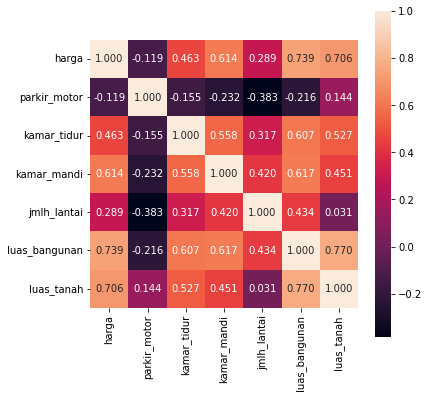

In [7]:
columns_ = ["harga", "parkir_motor", "kamar_tidur", "kamar_mandi", "jmlh_lantai", "luas_bangunan", "luas_tanah"]
corr_ = data[columns_].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

**Hasil**
* yang berkolerasi rendah dengan harga itu parkir motor dan jumlah lantai. Apakah perlu dihilangkan?

# Multikolinearitas

In [20]:
def preprocessing(X):    
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [21]:
X= data[['parkir_motor','kamar_tidur', 'kamar_mandi', 'jmlh_lantai', 'luas_bangunan', 'luas_tanah']]
preprocessing(X)

         VIF       Features
0   3.947905   parkir_motor
1  22.098036    kamar_tidur
2  15.037395    kamar_mandi
3  12.976851    jmlh_lantai
4  20.275121  luas_bangunan
5  24.580001     luas_tanah


* Jika tidak menggunakan scaling, nilai VIF-nya sangat tinggi

In [22]:
def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [12]:
X= data[['parkir_motor','kamar_tidur', 'kamar_mandi', 'jmlh_lantai', 'luas_bangunan', 'luas_tanah']]
preprocessing(X)

         VIF       Features
0   1.911379   parkir_motor
1   9.258716    kamar_tidur
2   6.407145    kamar_mandi
3   3.959388    jmlh_lantai
4  16.321308  luas_bangunan
5  16.506212     luas_tanah


* Nilai VIF tinggi = multikolinearitasnya kuat banget apakagi di luas bangunan, luas tanah

In [28]:
X= data[['parkir_motor','kamar_tidur', 'kamar_mandi', 'jmlh_lantai','luas_tanah']]
preprocessing(X)

        VIF      Features
0  1.573069  parkir_motor
1  9.258564   kamar_tidur
2  6.221455   kamar_mandi
3  3.164233   jmlh_lantai
4  6.633115    luas_tanah


* Nilai VIF udah sedikit lebih rendah -> tetapi itu akibat menghapus nilai luas bangunan, sedangkan luas bangunana merupakan fitur yang penting

In [29]:
X= data[['kamar_tidur', 'kamar_mandi', 'jmlh_lantai','luas_tanah', 'luas_bangunan']]
preprocessing(X)

         VIF       Features
0   9.071012    kamar_tidur
1   6.378395    kamar_mandi
2   3.952386    jmlh_lantai
3  12.305601     luas_tanah
4  13.432471  luas_bangunan


* Jika tidak menggunakan nilai parkir_motor